<a href="https://colab.research.google.com/github/weisses1/swcolabfiles/blob/main/ts_Weisse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
timeseries1 = r'/content/final_timeseries_1.csv'
ts1 = pd.read_csv(timeseries1, parse_dates= ['date']).set_index("date").sort_index()
ts1

,demand
date,
2022-01-01,NaN
2022-01-02,102.0
2022-01-03,113.0
2022-01-04,125.0
2022-01-05,111.0
...,...
2023-12-27,498.0
2023-12-28,498.0
2023-12-29,499.0


In [81]:
timeseries2 = r'/content/final_timeseries_2.csv'
ts2 = pd.read_csv(timeseries2, parse_dates= ['date']).set_index("date").sort_index()
ts2

,demand
date,
2022-01-01,104.0
2022-01-02,145.0
2022-01-03,138.0
2022-01-04,105.0
2022-01-05,109.0
...,...
2023-12-27,516.0
2023-12-28,468.0
2023-12-29,486.0


In [82]:
ts1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 690 entries, 2022-01-01 to 2023-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   demand  660 non-null    float64
dtypes: float64(1)
memory usage: 10.8 KB


In [83]:
ts_min = ts1.index.min()
ts_max = ts1.index.max()

In [84]:
ts_max

Timestamp('2023-12-31 00:00:00')

In [85]:
ts_min

Timestamp('2022-01-01 00:00:00')

In [86]:
full_range = pd.date_range(ts_min,ts_max)

In [87]:
missing_dates_ts1 = full_range.difference(ts1.index)

In [88]:
ts2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 690 entries, 2022-01-01 to 2023-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   demand  660 non-null    float64
dtypes: float64(1)
memory usage: 10.8 KB


In [89]:
missing_dates_ts2 = full_range.difference(ts2.index)

In [90]:
missing_dates_ts1

DatetimeIndex(['2022-01-19', '2022-01-30', '2022-02-21', '2022-03-04',
               '2022-03-09', '2022-03-12', '2022-03-24', '2022-04-19',
               '2022-04-28', '2022-05-18', '2022-06-26', '2022-08-20',
               '2022-09-04', '2022-09-21', '2022-12-04', '2023-01-20',
               '2023-01-27', '2023-02-15', '2023-02-25', '2023-03-01',
               '2023-03-12', '2023-03-17', '2023-04-05', '2023-04-25',
               '2023-05-10', '2023-05-20', '2023-06-14', '2023-06-18',
               '2023-07-07', '2023-07-15', '2023-07-26', '2023-07-28',
               '2023-08-04', '2023-08-07', '2023-09-24', '2023-10-04',
               '2023-10-13', '2023-10-16', '2023-11-13', '2023-12-25'],
              dtype='datetime64[ns]', freq=None)

In [91]:
print('Missing in ts1:',len(missing_dates_ts1))

Missing in ts1: 40


In [92]:
missing_dates_ts2

DatetimeIndex(['2022-02-27', '2022-05-16', '2022-06-13', '2022-06-27',
               '2022-07-01', '2022-07-20', '2022-08-10', '2022-08-18',
               '2022-08-28', '2022-10-06', '2022-10-08', '2022-10-09',
               '2022-10-16', '2022-11-01', '2022-11-28', '2022-12-24',
               '2022-12-27', '2023-01-02', '2023-01-06', '2023-01-25',
               '2023-02-06', '2023-03-25', '2023-03-27', '2023-03-28',
               '2023-04-21', '2023-05-11', '2023-05-14', '2023-05-16',
               '2023-06-07', '2023-06-22', '2023-07-01', '2023-07-18',
               '2023-07-19', '2023-08-05', '2023-09-09', '2023-09-11',
               '2023-10-31', '2023-11-11', '2023-11-15', '2023-11-19'],
              dtype='datetime64[ns]', freq=None)

In [93]:
print('Missing in ts2:',len(missing_dates_ts2))

Missing in ts2: 40


In [94]:
na_ts1 = ts1.isna().sum().sum()
print('Missing NA values in ts1:',na_ts1)

Missing NA values in ts1: 30


In [95]:
na_ts2 = ts2.isna().sum().sum()
print('Missing NA values in ts2:',na_ts2)

Missing NA values in ts2: 30


In [96]:
ts1_reindex = ts1.reindex(full_range)
ts1_reindex

,demand
2022-01-01,NaN
2022-01-02,102.0
2022-01-03,113.0
2022-01-04,125.0
2022-01-05,111.0
...,...
2023-12-27,498.0
2023-12-28,498.0
2023-12-29,499.0
2023-12-30,488.0


In [97]:
missing_reindex_ts1 = ts1_reindex.isna().sum().sum()
print('Missing NA values in ts1 after reindex:',missing_reindex_ts1)

Missing NA values in ts1 after reindex: 70


In [98]:
ts2_reindex = ts2.reindex(full_range)
ts2_reindex

,demand
2022-01-01,104.0
2022-01-02,145.0
2022-01-03,138.0
2022-01-04,105.0
2022-01-05,109.0
...,...
2023-12-27,516.0
2023-12-28,468.0
2023-12-29,486.0
2023-12-30,521.0


In [99]:
missing_reindex_ts2 = ts2_reindex.isna().sum().sum()
print('Missing NA values in ts2 after reindex:',missing_reindex_ts2)

Missing NA values in ts2 after reindex: 70


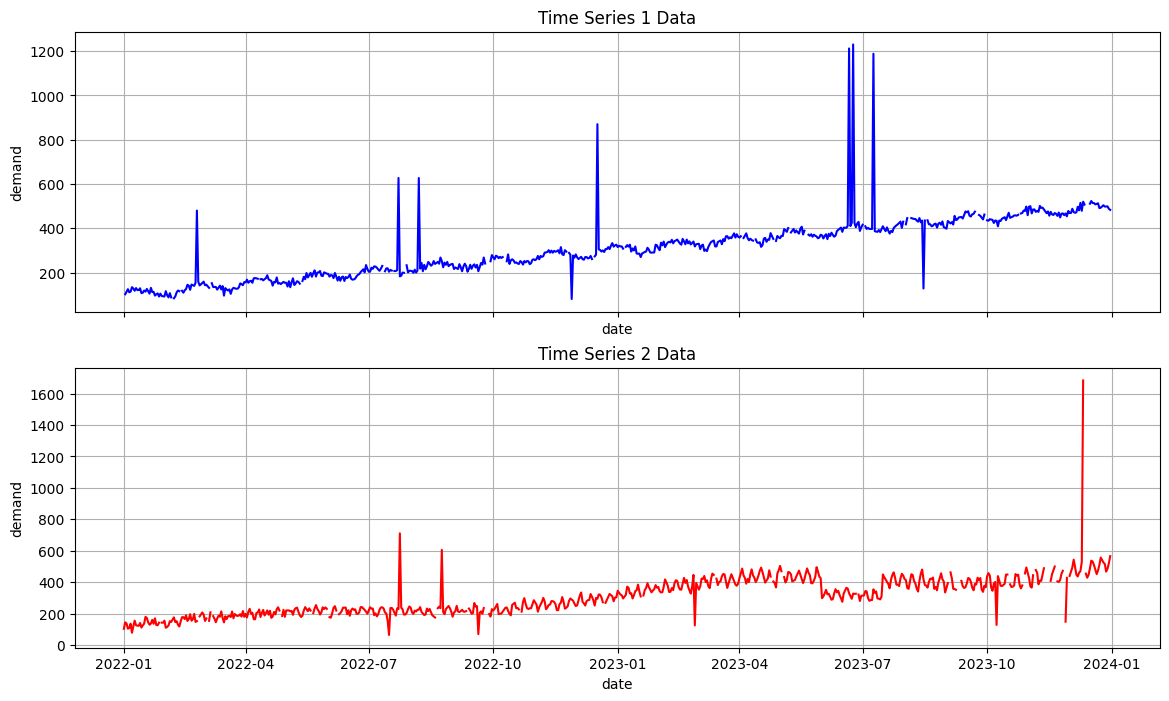

In [111]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 8), sharex=True)

axes[0].plot(ts1.index, ts1['demand'], color='blue')
axes[0].set_title('Time Series 1 Data')
axes[0].set_xlabel('date')
axes[0].set_ylabel('demand')
axes[0].grid(True)

axes[1].plot(ts2.index, ts2['demand'], color='red')
axes[1].set_title('Time Series 2 Data')
axes[1].set_xlabel('date')
axes[1].set_ylabel('demand')
axes[1].grid(True)

plt.show();